In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [145]:

residential_demand = pd.read_csv('residential_demand.csv')
residential_demand.Timestamp = pd.to_datetime(residential_demand.Timestamp)
residential_demand['Year'] = residential_demand.Timestamp.dt.year
residential_demand['Month'] = residential_demand.Timestamp.dt.month
residential_demand['Day'] = residential_demand.Timestamp.dt.day
residential_demand['Hour'] = residential_demand.Timestamp.dt.hour
residential_demand['Minute'] = residential_demand.Timestamp.dt.minute
residential_demand['Second'] = residential_demand.Timestamp.dt.second

turbine_telemetry = pd.read_csv('turbine_telemetry.csv')
turbine_telemetry.Timestamp = pd.to_datetime(turbine_telemetry.Timestamp)
turbine_telemetry['Year'] = turbine_telemetry.Timestamp.dt.year
turbine_telemetry['Month'] = turbine_telemetry.Timestamp.dt.month
turbine_telemetry['Day'] = turbine_telemetry.Timestamp.dt.day
turbine_telemetry['Hour'] = turbine_telemetry.Timestamp.dt.hour
turbine_telemetry['Minute'] = turbine_telemetry.Timestamp.dt.minute
turbine_telemetry['Second'] = turbine_telemetry.Timestamp.dt.second

In [146]:
# Change the power_kw which is largrer than setpoint_kw to setpoint_kw
location = turbine_telemetry['Power_kw'] >= turbine_telemetry['Setpoint_kw']
turbine_telemetry.loc[location, 'Power_kw'] = 900
print(len(turbine_telemetry[(turbine_telemetry.Setpoint_kw<900)]))
print(len(turbine_telemetry[turbine_telemetry.Setpoint_kw==0]))

121254
89877


In [147]:
# data processing: remove the rows with nan values. For future data processing, please use turbine_telemetry_replace_nan as the dataset
turbine_telemetry_replace_nan = turbine_telemetry.copy()
Power_Wind_pd = turbine_telemetry_replace_nan[['Timestamp','Power_kw','Wind_ms']]
Setpoint_pd = turbine_telemetry_replace_nan[['Timestamp','Setpoint_kw']]
print(len(Power_Wind_pd.loc[(Power_Wind_pd.isna().Power_kw) | (Power_Wind_pd.isna().Wind_ms) ]),"rows are empty in Power_Wind_pd")
print(len(Setpoint_pd.loc[(Setpoint_pd.isna().Setpoint_kw)]),"rows are empty in Setpoint_pd")
Power_Wind_pd.fillna(method='bfill',inplace=True)
Setpoint_pd.fillna(method='ffill',inplace=True)
turbine_telemetry_replace_nan = pd.merge(turbine_telemetry_replace_nan, Power_Wind_pd, on=["Timestamp"])
turbine_telemetry_replace_nan = pd.merge(turbine_telemetry_replace_nan, Setpoint_pd, on=["Timestamp"])
turbine_telemetry_replace_nan=turbine_telemetry_replace_nan.drop(columns = ['Power_kw_x','Setpoint_kw_x','Wind_ms_x'])

turbine_telemetry_replace_nan['Timestamp_minus_sc'] = turbine_telemetry_replace_nan['Timestamp'].dt.floor('T')
turbine_telemetry_replace_nan = turbine_telemetry_replace_nan.drop_duplicates(subset=['Timestamp_minus_sc'], keep='last')

turbine_telemetry_replace_nan

3554 rows are empty in Power_Wind_pd
2715 rows are empty in Setpoint_pd


C:\Users\yuxif\anaconda3\Anaconda\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,Timestamp,Year,Month,Day,Hour,Minute,Second,Power_kw_y,Wind_ms_y,Setpoint_kw_y,Timestamp_minus_sc
0,2015-05-28 00:00:23,2015,5,28,0,0,23,80.0,4.9,900.0,2015-05-28 00:00:00
1,2015-05-28 00:01:23,2015,5,28,0,1,23,78.0,5.4,900.0,2015-05-28 00:01:00
2,2015-05-28 00:02:23,2015,5,28,0,2,23,52.0,4.9,900.0,2015-05-28 00:02:00
3,2015-05-28 00:03:23,2015,5,28,0,3,23,57.0,4.6,900.0,2015-05-28 00:03:00
4,2015-05-28 00:04:23,2015,5,28,0,4,23,54.0,4.6,900.0,2015-05-28 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...
1069631,2018-01-11 06:10:32,2018,1,11,6,10,32,99.0,5.9,900.0,2018-01-11 06:10:00
1069632,2018-01-11 06:11:32,2018,1,11,6,11,32,105.0,5.7,900.0,2018-01-11 06:11:00
1069633,2018-01-11 06:12:32,2018,1,11,6,12,32,93.0,5.8,900.0,2018-01-11 06:12:00
1069634,2018-01-11 06:13:32,2018,1,11,6,13,32,97.0,5.5,900.0,2018-01-11 06:13:00


In [61]:
residential_demand
turbine_telemetry_replace_nan

,Timestamp,Year,Month,Day,Hour,Minute,Second,Power_kw_y,Wind_ms_y,Setpoint_kw_y,Timestamp_minus_sc
0,2015-05-28 00:00:23,2015,5,28,0,0,23,80.0,4.9,900.0,2015-05-28 00:00:00
1,2015-05-28 00:01:23,2015,5,28,0,1,23,78.0,5.4,900.0,2015-05-28 00:01:00
2,2015-05-28 00:02:23,2015,5,28,0,2,23,52.0,4.9,900.0,2015-05-28 00:02:00
3,2015-05-28 00:03:23,2015,5,28,0,3,23,57.0,4.6,900.0,2015-05-28 00:03:00
4,2015-05-28 00:04:23,2015,5,28,0,4,23,54.0,4.6,900.0,2015-05-28 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...
1069631,2018-01-11 06:10:32,2018,1,11,6,10,32,99.0,5.9,900.0,2018-01-11 06:10:00
1069632,2018-01-11 06:11:32,2018,1,11,6,11,32,105.0,5.7,900.0,2018-01-11 06:11:00
1069633,2018-01-11 06:12:32,2018,1,11,6,12,32,93.0,5.8,900.0,2018-01-11 06:12:00
1069634,2018-01-11 06:13:32,2018,1,11,6,13,32,97.0,5.5,900.0,2018-01-11 06:13:00


In [148]:
import datetime
turbine_telemetry_replace_nan['Timestamp_H'] = turbine_telemetry_replace_nan['Timestamp'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour,30*(dt.minute // 30)))
turbine_telemetry_replace_nan



,Timestamp,Year,Month,Day,Hour,Minute,Second,Power_kw_y,Wind_ms_y,Setpoint_kw_y,Timestamp_minus_sc,Timestamp_H
0,2015-05-28 00:00:23,2015,5,28,0,0,23,80.0,4.9,900.0,2015-05-28 00:00:00,2015-05-28 00:00:00
1,2015-05-28 00:01:23,2015,5,28,0,1,23,78.0,5.4,900.0,2015-05-28 00:01:00,2015-05-28 00:00:00
2,2015-05-28 00:02:23,2015,5,28,0,2,23,52.0,4.9,900.0,2015-05-28 00:02:00,2015-05-28 00:00:00
3,2015-05-28 00:03:23,2015,5,28,0,3,23,57.0,4.6,900.0,2015-05-28 00:03:00,2015-05-28 00:00:00
4,2015-05-28 00:04:23,2015,5,28,0,4,23,54.0,4.6,900.0,2015-05-28 00:04:00,2015-05-28 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
1069631,2018-01-11 06:10:32,2018,1,11,6,10,32,99.0,5.9,900.0,2018-01-11 06:10:00,2018-01-11 06:00:00
1069632,2018-01-11 06:11:32,2018,1,11,6,11,32,105.0,5.7,900.0,2018-01-11 06:11:00,2018-01-11 06:00:00
1069633,2018-01-11 06:12:32,2018,1,11,6,12,32,93.0,5.8,900.0,2018-01-11 06:12:00,2018-01-11 06:00:00
1069634,2018-01-11 06:13:32,2018,1,11,6,13,32,97.0,5.5,900.0,2018-01-11 06:13:00,2018-01-11 06:00:00


In [150]:
#In this session we calculate total curtailed energy -> Q1

# convert power,wind,setpoint from min to half hour
max_Pwer_kw_y=turbine_telemetry_replace_nan.groupby(['Year','Wind_ms_y'])['Power_kw_y'].max()

max_Pwer_kw_y= pd.DataFrame(max_Pwer_kw_y)
max_Pwer_kw_y.reset_index()

# Calculate curtailed energy
turbine_curtailed = pd.merge(turbine_telemetry_replace_nan,max_Pwer_kw_y, how ='left',on=['Year','Wind_ms_y'])
turbine_curtailed = turbine_curtailed.rename(columns = {"Power_kw_y_y": "Max_power_kw_year_wind_ms"})
turbine_curtailed['curtailed_capacity'] = turbine_curtailed.Max_power_kw_year_wind_ms - turbine_curtailed.Power_kw_y_x

# remove those row where setpoint_kw = 900 or curtailed_capacity = 0
turbine_curtailed = turbine_curtailed[(turbine_curtailed.Setpoint_kw_y < 900) & (turbine_curtailed.curtailed_capacity>0)]

# Create the total curtailed capactiy by half hour time period
turbine_curtailed_HH = pd.DataFrame(turbine_curtailed.groupby(['Year','Timestamp_H'])['curtailed_capacity'].mean())
turbine_curtailed_HH.rename(columns={'curtailed_capacity':'curtailed_capacity(KW)'},inplace=True)


# Calculate the total curtailed energy per year  - per turbine!
total_curtailed_energy_per_year = pd.DataFrame(turbine_curtailed_HH.groupby(['Year'])['curtailed_capacity(KW)'].sum())
total_curtailed_energy_per_year['curtailed_energy(KWh)']= total_curtailed_energy_per_year['curtailed_capacity(KW)']/2

total_curtailed_energy_per_year


,curtailed_capacity(KW),curtailed_energy(KWh)
Year,,
2015,74348.886780,37174.443390
2016,844309.568548,422154.784274
2017,389929.293679,194964.646840
2018,368.000000,184.000000


    Hour  curtailed_capacity
0      0          262.632365
1      1          251.872494
2      2          282.088571
3      3          307.020713
4      4          284.510860
5      5          304.806836
6      6          300.660630
7      7          279.952941
8      8          251.765484
9      9          240.090236
10    10          264.164638
11    11          243.448148
12    12          207.772894
13    13          206.004189
14    14          225.079538
15    15          258.418521
16    16          230.217336
17    17          247.112578
18    18          205.386731
19    19          197.956294
20    20          253.326193
21    21          235.230769
22    22          247.158716
23    23          254.583779


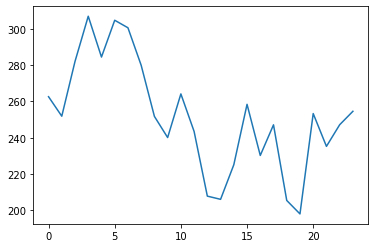

In [151]:
#In this session we calculate total demand

#turbine_curtailed_2017 = turbine_curtailed[turbine_curtailed.Year == 2016]
turbine_curtailed_2017 = turbine_curtailed

turbine_curtailed_2017['Hour'] = turbine_curtailed_2017['Timestamp_H'].dt.hour
turbine_curtailed_2017['Minute'] = turbine_curtailed_2017['Timestamp_H'].dt.minute
turbine_curtailed_2017_Hour_Minute = pd.DataFrame(data = turbine_curtailed_2017.groupby(['Hour'])['curtailed_capacity'].mean())
turbine_curtailed_2017_Hour_Minute=turbine_curtailed_2017_Hour_Minute.reset_index()
x = turbine_curtailed_2017_Hour_Minute.index.values
y = turbine_curtailed_2017_Hour_Minute.curtailed_capacity
print(turbine_curtailed_2017_Hour_Minute)
plt.plot(x,y)

In [198]:

#calculate total customer yearly demand
residential_demand['Total_energy_demand(KWh)'] = residential_demand.Demand_mean_kw * residential_demand.N_households/2
yearly_residential_demand = pd.DataFrame(residential_demand.groupby(['Year'])['Total_energy_demand(KWh)'].sum())

yearly_residential_demand=yearly_residential_demand.merge(total_curtailed_energy_per_year,on='Year',how='left')


#calculate percentage of curtailed energy out of total generation

yearly_residential_demand['Total_energy_demand(KWh)+export'] = yearly_residential_demand['Total_energy_demand(KWh)'] + 40*1000*365*24

#increase curtailed energy by 500 times as there is 500 turbines
yearly_residential_demand['curtailed_energy/total_consumption_2'] = 500*yearly_residential_demand['curtailed_energy(KWh)'] / yearly_residential_demand['Total_energy_demand(KWh)+export']
yearly_residential_demand['curtailed_energy/total_consumption'] = 500*yearly_residential_demand['curtailed_energy(KWh)'] / yearly_residential_demand['Total_energy_demand(KWh)']


# by taking assumption that total electricity demand=total number of household + there will always be 40MW energy to mainland at any point in time
# curtailed energy is 26.6% of total energy consumption.


,Total_energy_demand(KWh),curtailed_capacity(KW),curtailed_energy(KWh),Total_energy_demand(KWh)+export,curtailed_energy/total_consumption_2,curtailed_energy/total_consumption
Year,,,,,,
2017,1.647036e+07,389929.293679,194964.64684,3.668704e+08,0.265713,5.918650
2018,6.922175e+04,368.000000,184.00000,3.504692e+08,0.000263,1.329062


,Total_energy_demand(KWh),curtailed_capacity(KW),curtailed_energy(KWh),Total_energy_demand(KWh)-export,curtailed_energy/total_consumption_2,curtailed_energy/total_consumption
Year,,,,,,
2017,1.647036e+07,389929.293679,194964.64684,1.870364e+06,52.119427,5.918650
2018,6.922175e+04,368.000000,184.00000,-1.453078e+07,-0.006331,1.329062


# Q1: How much energy is currently curtailed annually across Orkney Isles?

### Step 1: 
To find max  curtailment from wind generator point of view
i.e. find difference betwee setpoint and power_kw_y. 
#This is the max amount of curtailment without customer consumption

Steps:
    1. curtailed energy per timestamp = Max(Power_kw_y - setpoint,0) => result_1 (done!)
    2 calculate energy curtailment based on historical_max_power_kw_-current_power_kw if setpoint>900 (to do by arianna &qian-aim for tonight   done!)
    3. aggregate the dataset to half hourly dataset (to do by arianna &qian-aim for tonight-done!)
    4. Calculate the yearly curtailed energy (to do by arianna &qian-aim for tonight-done!)
    
 

# Q2: How much can this be reduced by different levels of DR penetration?

### in addtion, Step 2 to include customer and 40MW export
To find available curtailment with customer demand involved. This is max amount of curtailment can be saved with extreme high DR penetration! 

i.e. new curtailment = result_1 - total demand - 40 (if there is any left_over, this is possible curtailment)

Steps: 
    1. Total customer demand = N households*Demand_mean_kw (to do by arianna &qian - aim for tonight - done!)  
    
    2. curstomer involved curtailment = Max(result_1 - 40 - total customer demand,0)  => call that result_2 (to do by arianna &qian-aim for tonight - we calculated the annual total)
        2.1 finding: curtailed energy = 26.6% of total energy consumption
        2.2 finding: total customer electricity consumption increase from 5-ish pm onwards, this is also the time that wind farm most likely been uncurtailed - see powerbi.
    



# Q3:How many local households would need to be on our DR scheme in order to supply this level of DR?

### in addition, Step 3 to include heating period in

#Note that the company have control of customer's heater, hence it's not on customer's side to determine whether he want to switch the control on or not

#As such, the company will choose the heating period that depend on time period that has maximum daily curtailed energy loss. This is because he he only have one year of customer's demand data and as such can't anticipate exactly what customer is going to demand in each day)

####  Note: We can further break it down to different seasonality, weekday/weekend, or at daily level for further steps!

Steps:
    1. search average heating time for hot water system, search for DR system MW 
    2. Plot avearge intraday curtailed energy => convert result_2 to average amount
    3. Calculate curtailed energy by split up result_2 by different charging window, and amount of customer!-- We need to align on how to deal with this problem!
        My thoughts:
            1. Assume customer penetration 10%, given charging window 2hour(as example), use the charging window from  previous step to calculate energy save that could potentionally be curtailed.
            2. What if we change customer penetration to 20%? How about 30%? How much energy can the company save now?
